## Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import re

## Import The Data

In [2]:
df = pd.read_csv('/Users/ramazansamilacak/Desktop/Data Analist Çalışmalarım/Coffee Quality Data/df_arabica_clean.csv')

## Basic Info About Our Data

In [3]:
df.head(3)

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"


In [4]:
df.shape

(207, 41)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [6]:
df.columns

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

## Duplicate Values 
- There is no duplicated rows

In [7]:
df.duplicated().any()

False

## Null Values

In [8]:
df.isna().sum()

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

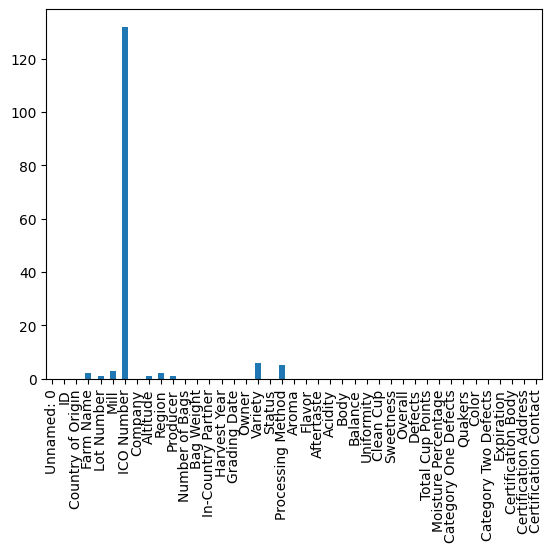

In [9]:
df.isna().sum().plot(kind='bar')
plt.show()

## Handling Null Values

## Changement Columns Values

#### ICO Number Columns

- We remove the 'ICO Number' columns because they contain too many null values and this column is not very useful for our analysis.

In [10]:
df = df.drop('ICO Number', axis = 1)

#### Altitude

- Let's convert the non-numeric values in this column to numeric values.
- For example, we can change 1500-1700 to 1600 with the code below.
- Thus, we find the average altitudes of the coffees.  

In [11]:
df2 = df.copy()

In [12]:
def process_altitude(value):
    if pd.notna(value):
        # '-' ve 'A' karakterlerine göre böl
        parts = [int(x) for x in re.split('-|A', value) if x.isdigit()]
        if parts:
            return np.mean(parts)
    return value

df2['Altitude'] = df2['Altitude'].apply(process_altitude)

In [13]:
print(df2['Altitude'])

0      1815.0
1      1200.0
2      1300.0
3      1900.0
4      1975.0
        ...  
202     950.0
203    1200.0
204    1300.0
205    1200.0
206     975.0
Name: Altitude, Length: 207, dtype: object


In [14]:
df2['Altitude'] = pd.to_numeric(df2['Altitude'], errors='coerce')

In [15]:
df2['Altitude'].dtype

dtype('float64')

In [16]:
df2['Altitude'].isna().sum()

8

#### Handling Missing Values of "Altitude" column 
- Looking at the statistics of the 'Altitude' column, we see that the overall trend of the column is close to the average (mean = 1284.5). In this case, it may make sense to use the mean value to fill in null values, as this may provide a more appropriate estimate of the overall distribution of the column.

In [17]:
df2['Altitude'].describe()

count     199.000000
mean     1284.500000
std       673.685377
min       139.000000
25%      1000.000000
50%      1300.000000
75%      1600.000000
max      5400.000000
Name: Altitude, dtype: float64

In [18]:
df2['Altitude'].fillna(df2['Altitude'].mean(), inplace=True)

### Bag Weight 
- Let's convert the non-numeric values in this column to numeric values.
- The data in this column is Objet because the numeric is followed by 'kg'. Example: 35 kg, 50 kg etc.
- So we convert it to numeric.

In [19]:
df2['Bag Weight'].dtype

dtype('O')

In [20]:
df3 = df2.copy()

In [21]:
df3['Bag Weight'] = df3['Bag Weight'].str.replace(' kg', '').astype(float)

In [22]:
df3['Bag Weight']

0      35.0
1      80.0
2      25.0
3      22.0
4      24.0
       ... 
202    60.0
203    30.0
204    60.0
205     2.0
206    60.0
Name: Bag Weight, Length: 207, dtype: float64

### Color Column 
- I noticed some confusion in the Color column. Some colors consist of two words, but some have the '-' symbol and some do not. I also changed 'yello-green' to 'yellow-green'.

In [23]:
df3['Color'].unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'yellow green',
       'greenish', 'brownish', 'yellow- green', 'browish-green',
       'bluish-green', 'pale yellow', 'yello-green'], dtype=object)

In [24]:
df4 = df3.copy()

In [25]:
df4['Color'] = df4['Color'].apply(lambda x: re.sub(r'\s+', '-', x.strip().replace('-', ' ')))

In [26]:
df4['Color'] = df4['Color'].replace('yello-green', 'yellow-green')

In [27]:
df4['Color'].unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'greenish',
       'brownish', 'browish-green', 'bluish-green', 'pale-yellow'],
      dtype=object)

## Handling Null Values

#### All columns of type 'Object' and containing Null values

- Let's fill the null values in the columns with the most used value of each column.

In [28]:
object_null_columns = df4.columns[(df4.dtypes == 'object') & (df4.isnull().any())]
print(object_null_columns)

Index(['Farm Name', 'Lot Number', 'Mill', 'Region', 'Producer', 'Variety',
       'Processing Method'],
      dtype='object')


In [29]:
for column in object_null_columns:
    most_frequent_value = df4[column].mode()[0]
    df4[column].fillna(most_frequent_value, inplace=True)

#### All columns of type 'Numeric' and containing Null values

- There is no numeric columns that include Null values

## Analyze and Visualize

### Basic Analyze and Visualize

In [30]:
df4.describe()

,Unnamed: 0,ID,Altitude,Number of Bags,Bag Weight,Aroma,Flavor,Aftertaste,Acidity,Body,...,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,...,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,1284.500000,155.449275,227.782609,7.721063,7.744734,7.599758,7.69029,7.640918,...,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,660.474577,244.484868,1878.909774,0.287626,0.279613,0.275911,0.25951,0.233499,...,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,139.000000,1.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,...,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1020.000000,1.000000,15.000000,7.580000,7.580000,7.420000,7.50000,7.500000,...,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,1300.000000,14.000000,30.000000,7.670000,7.750000,7.580000,7.67000,7.670000,...,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,1592.500000,275.000000,60.000000,7.920000,7.920000,7.750000,7.87500,7.750000,...,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,5400.000000,2240.000000,19200.000000,8.580000,8.500000,8.420000,8.58000,8.250000,...,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


##### 'Altitude', 'Number of Bags', 'Bag Weight', 'Overall', 'Total Cup Points' Relations
- In our dataset, numerous numeric columns are present. Additionally, the columns 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', and 'Balance' exhibit remarkably similar values. To effectively represent these attributes, I have opted to utilize the 'Overall' column.

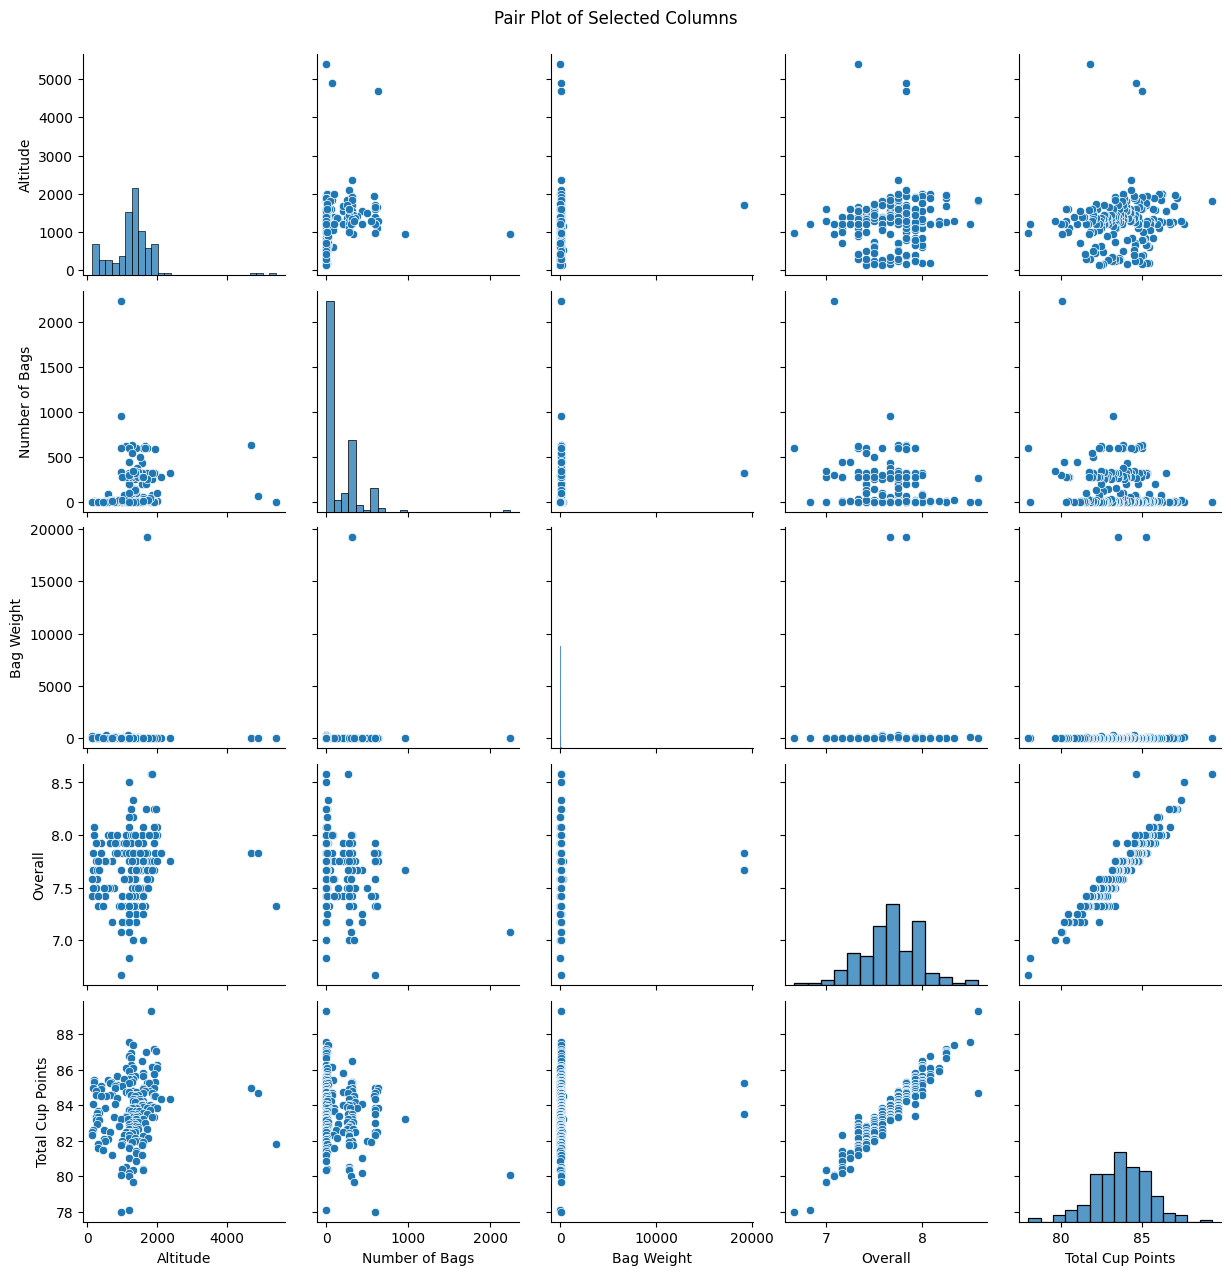

In [31]:
selected_columns = ['Altitude', 'Number of Bags', 'Bag Weight', 'Overall', 'Total Cup Points']
selected_df = df4[selected_columns]

sns.pairplot(selected_df)
plt.suptitle('Pair Plot of Selected Columns', y=1.02)
plt.show()

##### Heat MAp 
- The goal is to comprehend the relationships among all the numerical columns in our dataset.
- Since there is only a single value in the Clean Cup, Sweetness and Defects columns, I do not include these columns in my heat map.

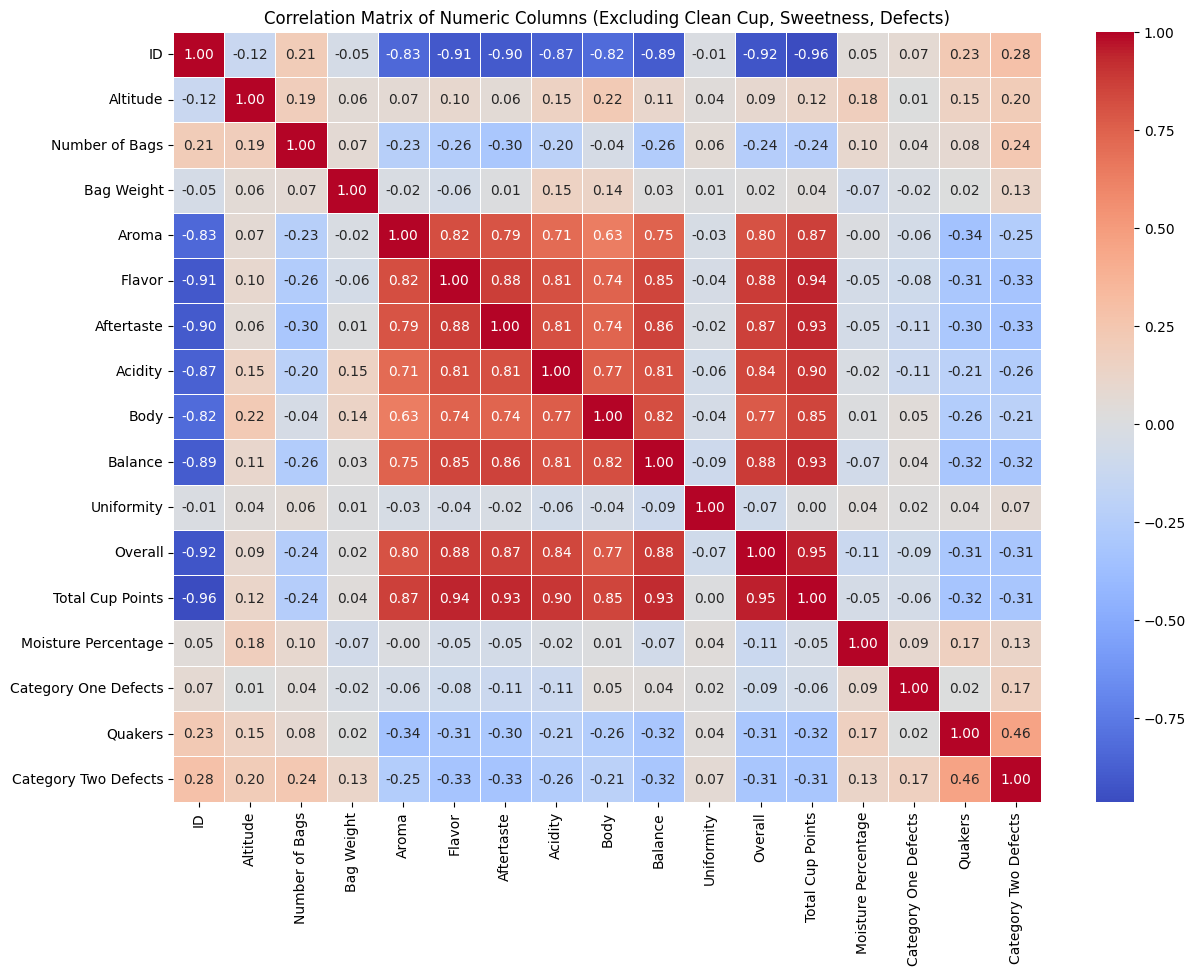

In [32]:
# Drop 'Unnamed: 0', 'Clean Cup', 'Sweetness', 'Defects' columns
numeric_columns_except_special = df4.select_dtypes(include=['number']).drop(['Unnamed: 0', 'Clean Cup', 'Sweetness', 'Defects'], axis=1)

# Making the coraletion matrix
correlation_matrix_except_special = numeric_columns_except_special.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_except_special, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns (Excluding Clean Cup, Sweetness, Defects)')
plt.show()

### Now let's ask some questions about each column, and based on these questions, let's conduct our analysis of that column.

#### Altitude Column Analysis

In [33]:
highest_correlation_column = df4.select_dtypes(include=['number']).corr()['Altitude'].sort_values(ascending=False)
highest_correlation_column

Altitude                1.000000
Body                    0.223573
Category Two Defects    0.203849
Number of Bags          0.187969
Moisture Percentage     0.181725
Acidity                 0.150890
Quakers                 0.150670
Total Cup Points        0.124811
Balance                 0.107932
Flavor                  0.098043
Overall                 0.091713
Aroma                   0.067402
Aftertaste              0.063806
Bag Weight              0.061057
Uniformity              0.040553
Category One Defects    0.011830
ID                     -0.122462
Unnamed: 0             -0.122462
Clean Cup                    NaN
Sweetness                    NaN
Defects                      NaN
Name: Altitude, dtype: float64

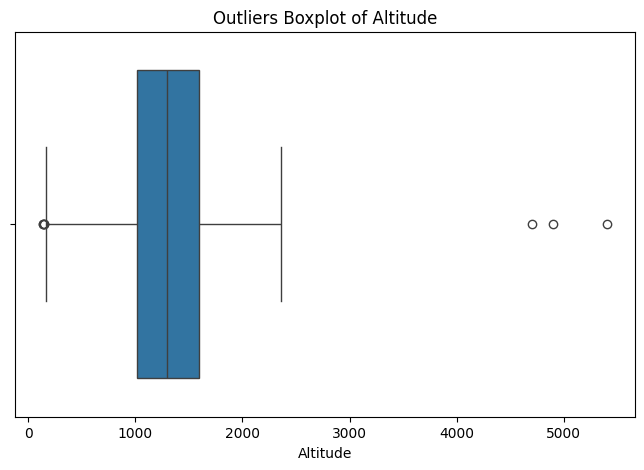

In [34]:
# Outliers in Altitude column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df4['Altitude'])
plt.title('Outliers Boxplot of Altitude')
plt.xlabel('Altitude')
plt.show()

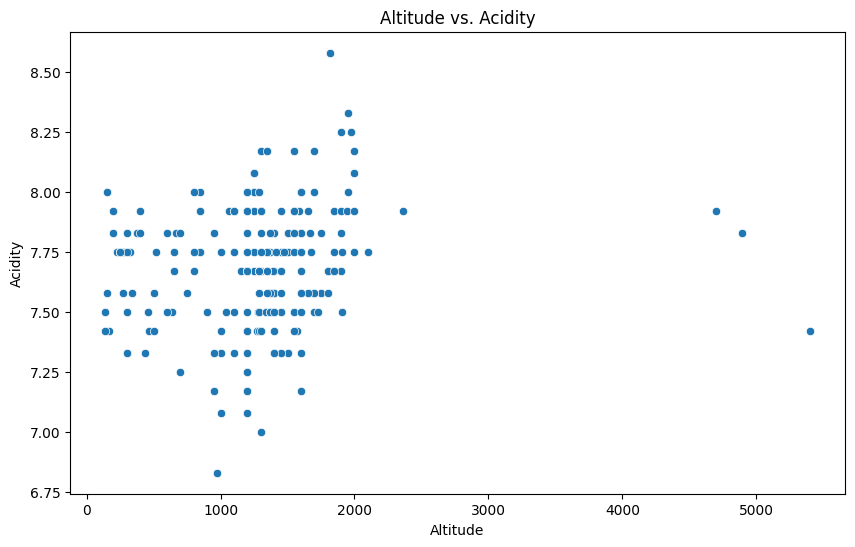

In [35]:
# How does the acidity value of coffee change as the altitude increases?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Altitude', y='Acidity', data=df4[['Altitude', 'Acidity']].dropna())
plt.title('Altitude vs. Acidity')
plt.xlabel('Altitude')
plt.ylabel('Acidity')
plt.show()

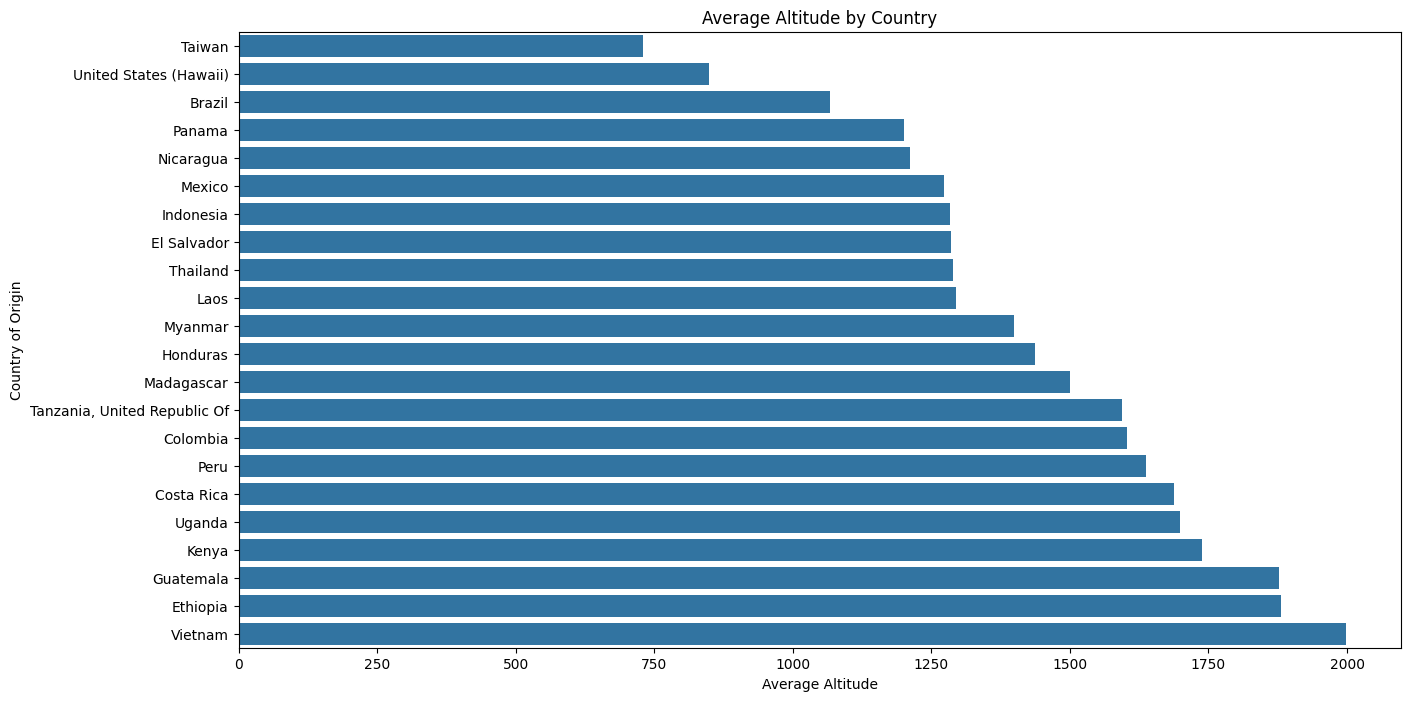

In [36]:
# Average altitudes of coffee production in countries of origin
avg_altitude_by_country = df4.groupby('Country of Origin')['Altitude'].mean().reset_index()

plt.figure(figsize=(15, 8))
sns.barplot(x='Altitude', y='Country of Origin', data=avg_altitude_by_country, order=avg_altitude_by_country.sort_values('Altitude')['Country of Origin'])
plt.title('Average Altitude by Country')
plt.xlabel('Average Altitude')
plt.ylabel('Country of Origin')
plt.show()

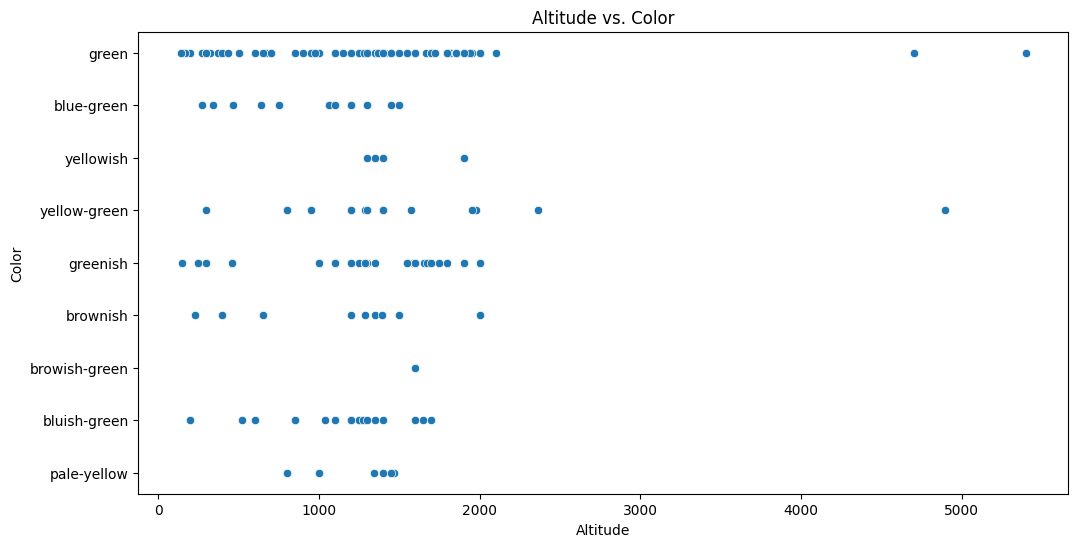

In [37]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Altitude', y='Color', data=df4)
plt.title('Altitude vs. Color')
plt.xlabel('Altitude')
plt.ylabel('Color')
plt.show()

#### Color Coloumn 

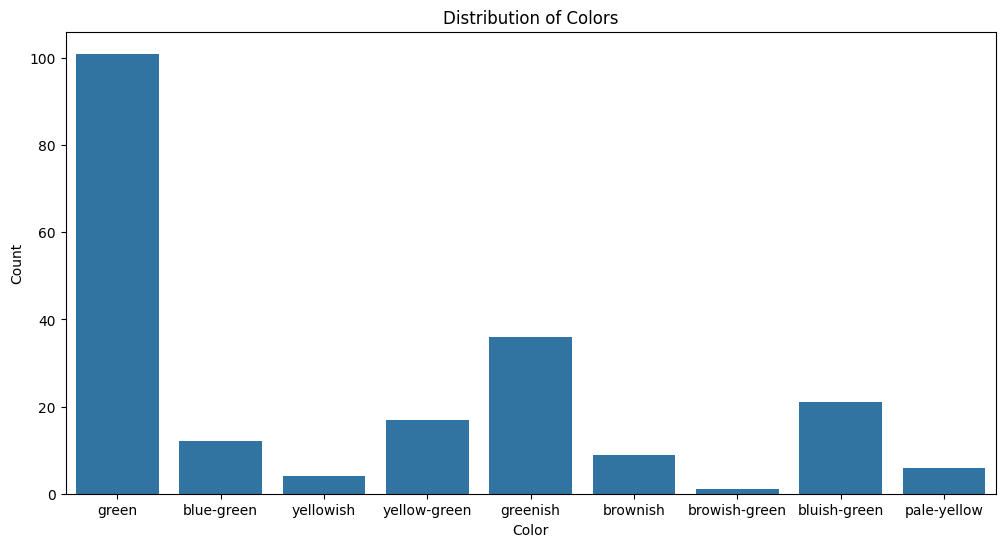

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Color', data=df4)
plt.title('Distribution of Colors')
plt.xlabel('Color')
plt.ylabel('Count')
plt.show()

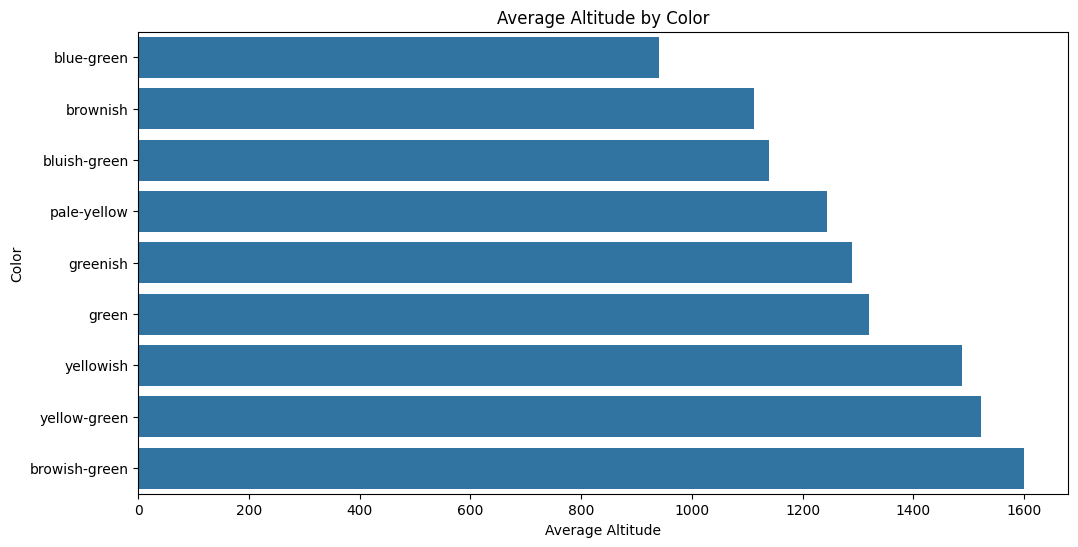

In [39]:
# Does altitude affect coffee color?
avg_altitude_by_color = df4.groupby('Color')['Altitude'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Altitude', y='Color', data=avg_altitude_by_color, order=avg_altitude_by_color.sort_values('Altitude')['Color'])
plt.title('Average Altitude by Color')
plt.xlabel('Average Altitude')
plt.ylabel('Color')
plt.show()

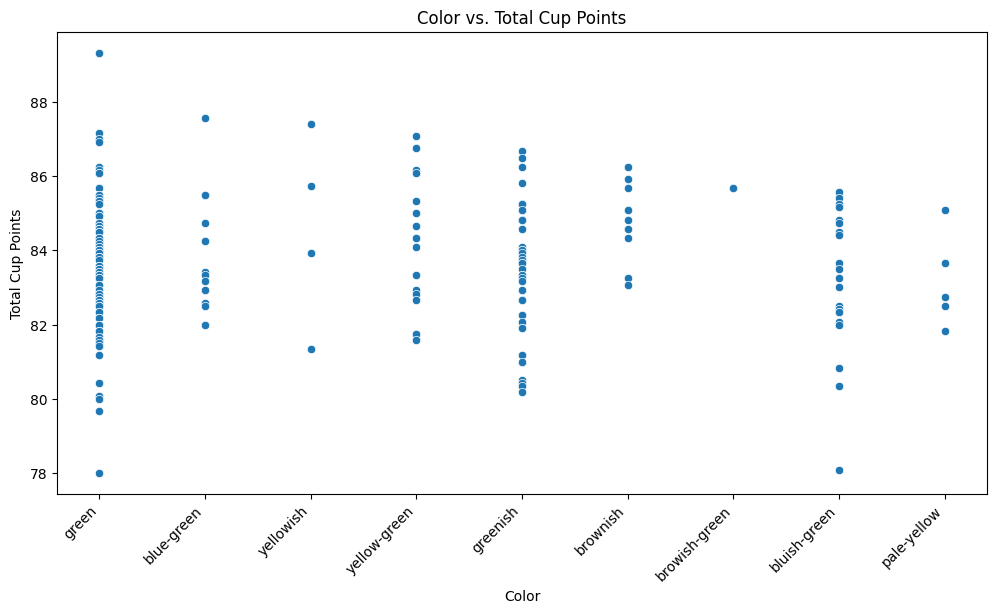

In [40]:
# Color and Total Cup Points Relations
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Color', y='Total Cup Points', data=df4)
plt.title('Color vs. Total Cup Points')
plt.xlabel('Color')
plt.ylabel('Total Cup Points')
plt.xticks(rotation=45, ha='right')  # Renk etiketlerini 45 derece sağa döndürme
plt.show()

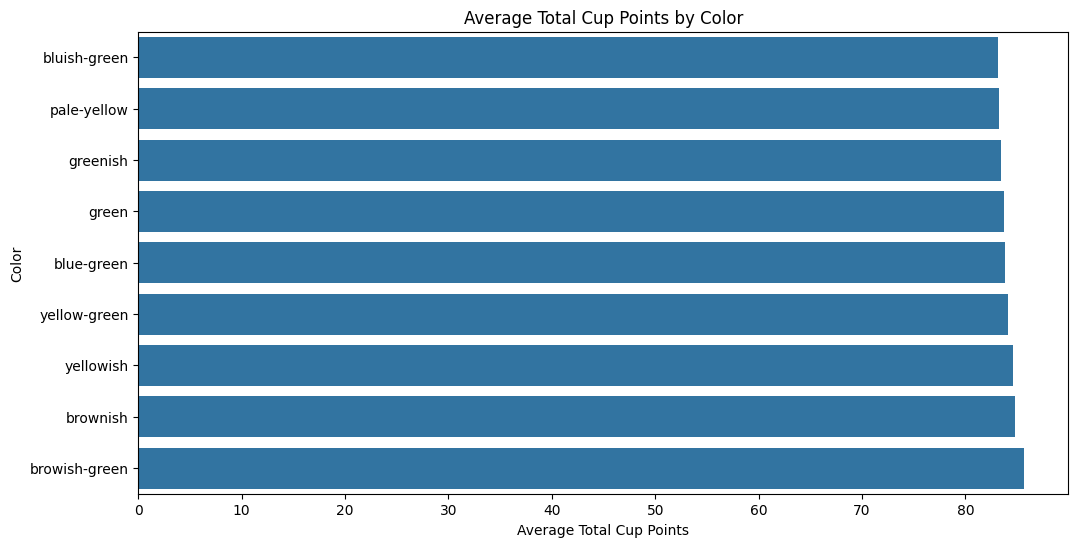

In [41]:
avg_total_cup_points_by_color = df4.groupby('Color')['Total Cup Points'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Cup Points', y='Color', data=avg_total_cup_points_by_color, order=avg_total_cup_points_by_color.sort_values('Total Cup Points')['Color'])
plt.title('Average Total Cup Points by Color')
plt.xlabel('Average Total Cup Points')
plt.ylabel('Color')
plt.show()

### Bag Weight 

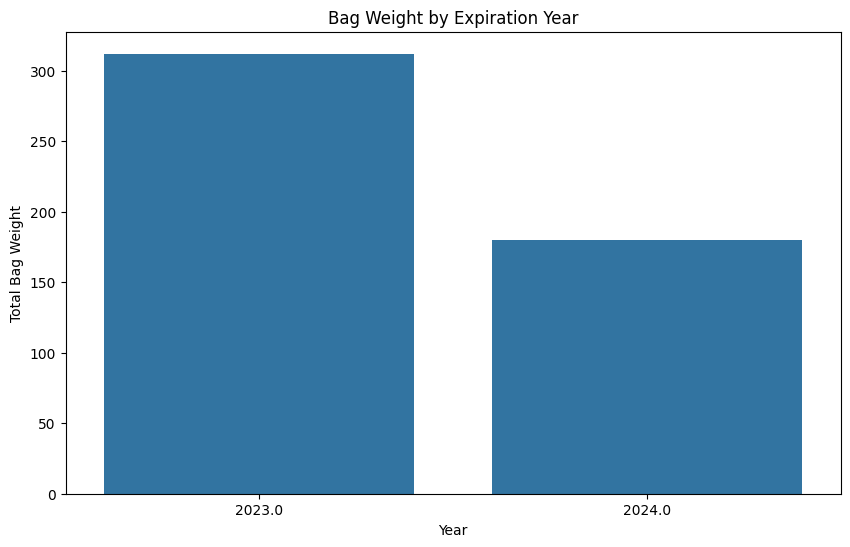

In [42]:
# Bag Weight by Expiration Year
df4['Expiration'] = pd.to_datetime(df4['Expiration'], errors='coerce')

df4['Year'] = df4['Expiration'].dt.year
df_yearly = df4.groupby('Year').agg({'Bag Weight': 'sum'}).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Bag Weight', data=df_yearly)
plt.title('Bag Weight by Expiration Year')
plt.xlabel('Year')
plt.ylabel('Total Bag Weight')
plt.show()

### Total Cup Points

In [43]:
# Total Cup Points' Corelation 
total_cuppoints_correlation_column = df4.select_dtypes(include=['number']).corr()['Total Cup Points'].sort_values(ascending=False)
total_cuppoints_correlation_column

Total Cup Points        1.000000
Overall                 0.947217
Flavor                  0.939124
Aftertaste              0.934813
Balance                 0.929520
Acidity                 0.897057
Aroma                   0.868919
Body                    0.847216
Altitude                0.124811
Bag Weight              0.038214
Uniformity              0.003556
Moisture Percentage    -0.046476
Category One Defects   -0.058156
Year                   -0.130948
Number of Bags         -0.243753
Category Two Defects   -0.314092
Quakers                -0.320307
ID                     -0.963143
Unnamed: 0             -0.963143
Clean Cup                    NaN
Sweetness                    NaN
Defects                      NaN
Name: Total Cup Points, dtype: float64

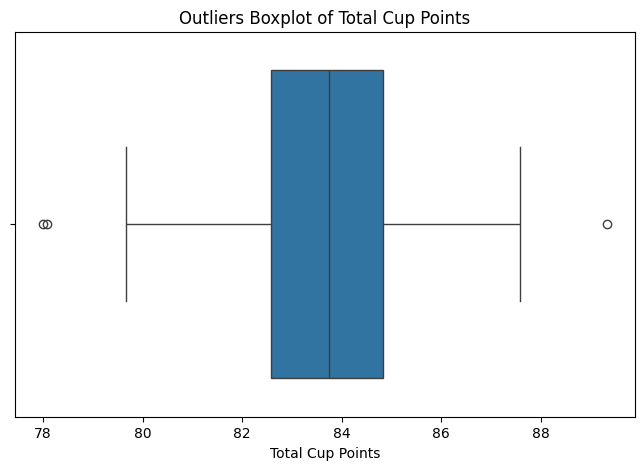

In [44]:
# Outliers in Total Cup Points column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df4['Total Cup Points'])
plt.title('Outliers Boxplot of Total Cup Points')
plt.xlabel('Total Cup Points')
plt.show()

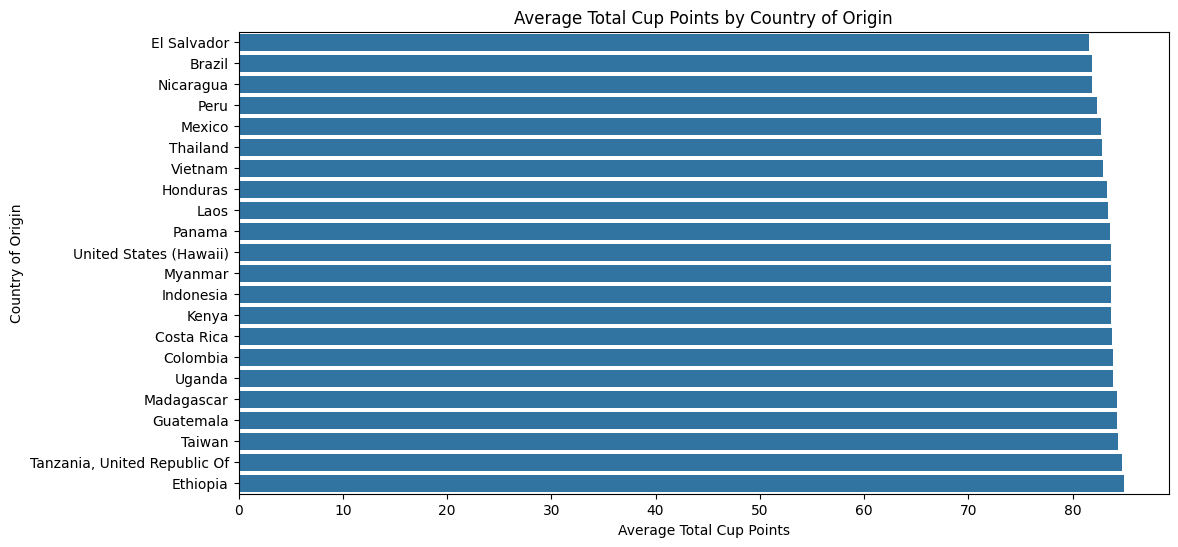

In [45]:
# Average Total Cup Points by Country of Origin 
avg_total_cup_points_by_country = df4.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Total Cup Points', y='Country of Origin', data=avg_total_cup_points_by_country, order=avg_total_cup_points_by_country.sort_values('Total Cup Points')['Country of Origin'])
plt.title('Average Total Cup Points by Country of Origin')
plt.xlabel('Average Total Cup Points')
plt.ylabel('Country of Origin')
plt.show()

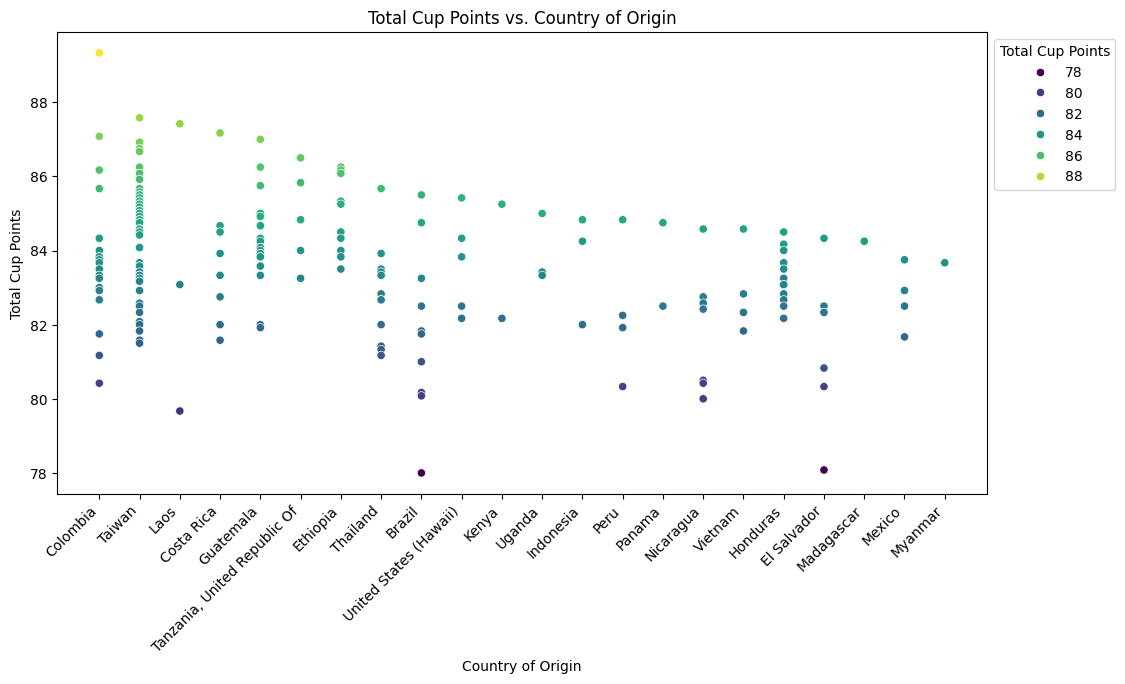

In [46]:
# Renk paletini tanımlama
color_palette = sns.color_palette("viridis", as_cmap=True)

# Scatter plot grafiğini çizme
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Country of Origin', y='Total Cup Points', data=df4, hue='Total Cup Points', palette=color_palette)
plt.title('Total Cup Points vs. Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Total Cup Points')
plt.xticks(rotation=45, ha='right')  # Ülke etiketlerini 45 derece sağa döndürme
plt.legend(title='Total Cup Points', loc='upper left', bbox_to_anchor=(1, 1))  # Renk skalası ekleme
plt.show()

### Processing Method

In [47]:
df['Processing Method'].unique()

array(['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey', nan,
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO'], dtype=object)

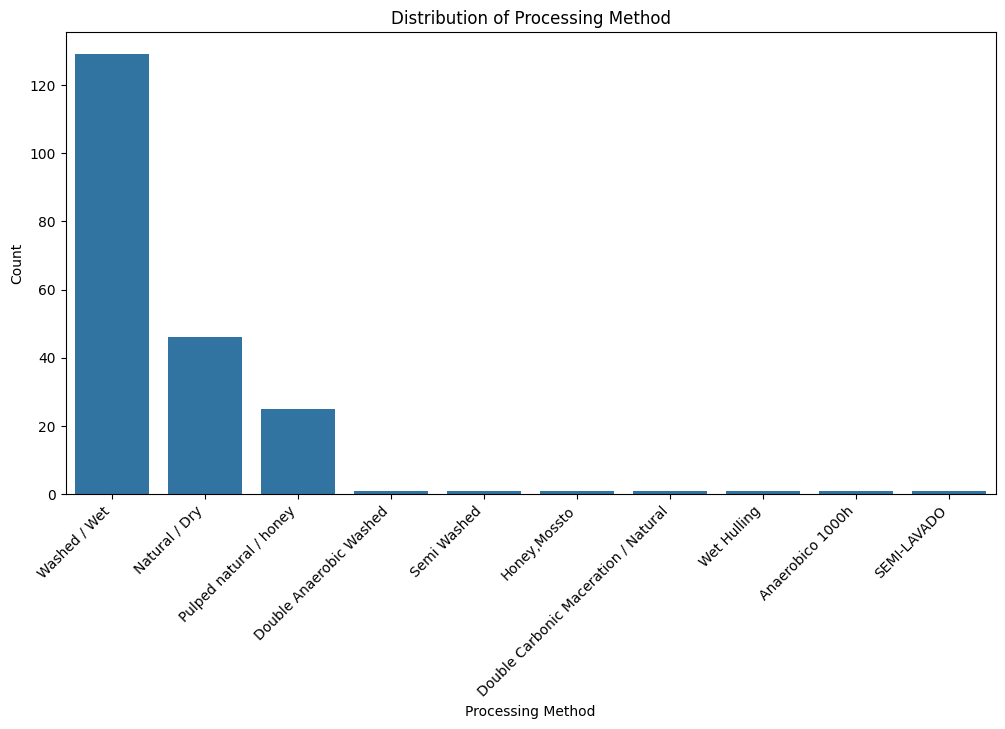

In [48]:
# Distribution of Processing Method
plt.figure(figsize=(12, 6))
sns.countplot(x='Processing Method', data=df4, order=df4['Processing Method'].value_counts().index)
plt.title('Distribution of Processing Method')
plt.xlabel('Processing Method')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.show()

### Number of Bags

In [49]:
# Number of Bags' Corelation 
number_bags_correlation_column = df4.select_dtypes(include=['number']).corr()['Number of Bags'].sort_values(ascending=False)
number_bags_correlation_column

Number of Bags          1.000000
Year                    0.665532
Category Two Defects    0.237407
ID                      0.209744
Unnamed: 0              0.209744
Altitude                0.187969
Moisture Percentage     0.102753
Quakers                 0.082271
Bag Weight              0.068795
Uniformity              0.059370
Category One Defects    0.043678
Body                   -0.040037
Acidity                -0.204415
Aroma                  -0.227414
Overall                -0.243440
Total Cup Points       -0.243753
Balance                -0.259016
Flavor                 -0.264700
Aftertaste             -0.304697
Clean Cup                    NaN
Sweetness                    NaN
Defects                      NaN
Name: Number of Bags, dtype: float64

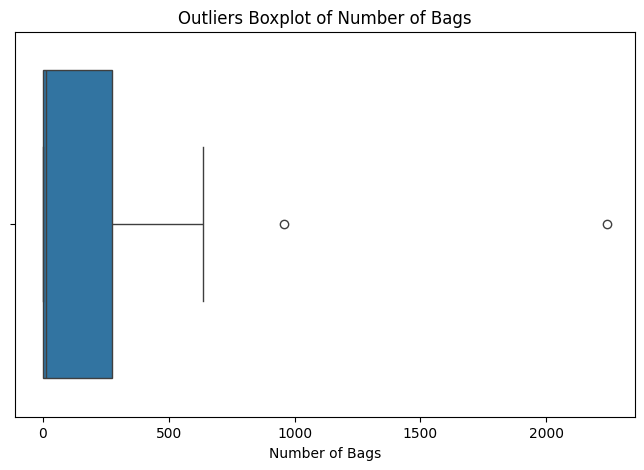

In [50]:
# Number of Bags in Total Cup Points column
plt.figure(figsize=(8, 5))
sns.boxplot(x=df4['Number of Bags'])
plt.title('Outliers Boxplot of Number of Bags')
plt.xlabel('Number of Bags')
plt.show()

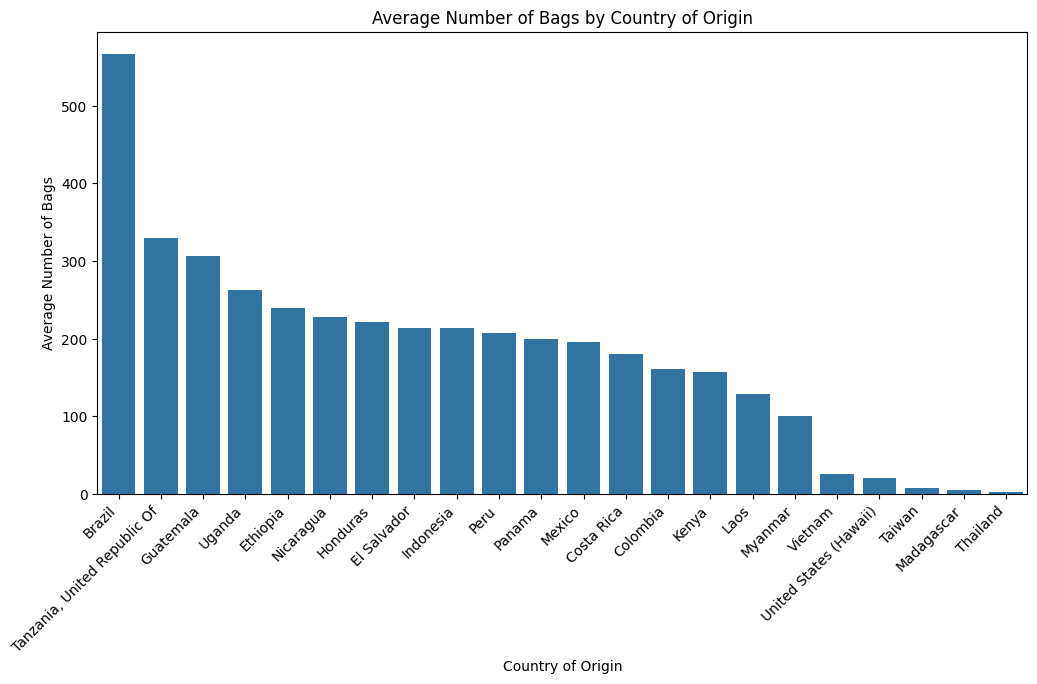

In [51]:
# Average Number of Bags by Country of Origin
average_bags_per_origin = df4.groupby('Country of Origin')['Number of Bags'].mean().reset_index()

sorted_countries = average_bags_per_origin.sort_values(by='Number of Bags', ascending=False)['Country of Origin'].tolist()

plt.figure(figsize=(12, 6))
sns.barplot(x='Country of Origin', y='Number of Bags', data=average_bags_per_origin, order=sorted_countries, errorbar=None)
plt.title('Average Number of Bags by Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Average Number of Bags')
plt.xticks(rotation=45, ha='right')  
plt.show()


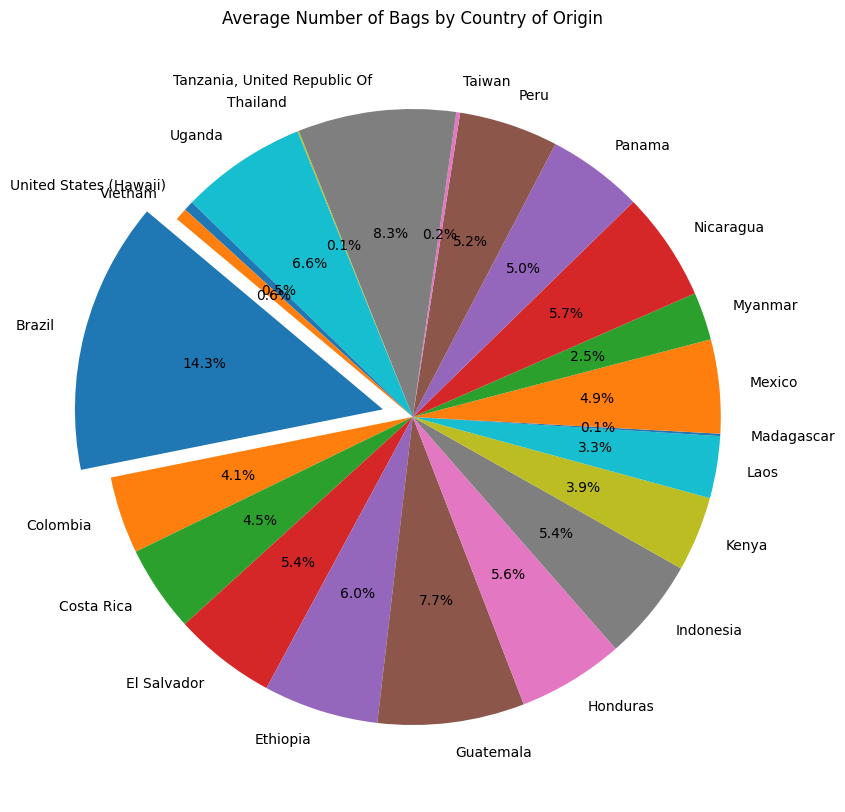

In [52]:
# Average Number of Bags by Country of Origin with Pie Chart

sizes = average_bags_per_origin['Number of Bags']
labels = average_bags_per_origin['Country of Origin']
explode = [0.1 if i == 0 else 0 for i in range(len(sizes))]  # Sadece ilk dilimi vurgula

plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Average Number of Bags by Country of Origin')

plt.show()

### World Map 

In [53]:
import plotly.express as px

In [56]:
# Average Total Cup Points by Country of Origin
fig = px.choropleth(df4, 
                    locations='Country of Origin',  
                    locationmode='country names',
                    color='Total Cup Points',  
                    hover_name='Country of Origin',  
                    color_continuous_scale=px.colors.sequential.Reds,  
                    title='Average Total Cup Points by Country of Origin') 

fig.show()
